# Analyzing Chikungunya data

In [1]:
from pysus import SINAN
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
sinan = SINAN().load()

In [3]:
casos = sinan.download(sinan.get_files('CHIK', 2015)).to_dataframe()

CHIKBR15.parquet: 100%|██████████████████████████████████████████████| 37.3k/37.3k [00:01<00:00, 37.0kB/s]


In [4]:
casos

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,...,COPAISINF,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,CS_FLXRET,FLXRECEBI,TP_SISTEMA,TPUNINOT
0,2,A920,,2015-01-01,201453,2015,28,280460,2061,2015-01-01,...,1,280460,2,1,,20151217,0,2,1,
1,2,A920,,2015-01-01,201453,2015,24,240310,1414,2015-01-01,...,0,,,,,20150309,0,2,1,
2,2,A920,,2015-01-01,201453,2015,26,260890,1507,2015-01-01,...,0,,,,,,0,,2,
3,2,A920,,2015-01-01,201453,2015,29,292630,1381,2015-01-01,...,1,292630,9,9,,20150113,0,2,1,
4,2,A920,,2015-01-01,201453,2015,29,292630,1381,2014-12-27,...,1,292630,9,9,,20150113,0,2,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53266,2,A920,,2015-12-31,201552,2015,26,260890,1507,2015-12-31,...,0,,,,,20151231,0,,2,
53267,2,A920,,2015-12-31,201552,2015,26,260410,1499,2015-12-26,...,0,,,1,,20160816,0,,2,
53268,2,A920,,2015-12-31,201552,2015,26,261160,1497,2015-12-26,...,0,,,,,,0,,2,
53269,2,A920,,2015-12-31,201552,2015,26,261160,1497,2015-12-29,...,0,,,1,,20160811,1,,2,


In [5]:
casos = casos[casos.ID_AGRAVO=='A920']

casos.head()

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,...,COPAISINF,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,CS_FLXRET,FLXRECEBI,TP_SISTEMA,TPUNINOT
0,2,A920,,2015-01-01,201453,2015,28,280460,2061,2015-01-01,...,1,280460,2,1,,20151217,0,2,1,
1,2,A920,,2015-01-01,201453,2015,24,240310,1414,2015-01-01,...,0,,,,,20150309,0,2,1,
2,2,A920,,2015-01-01,201453,2015,26,260890,1507,2015-01-01,...,0,,,,,,0,,2,
3,2,A920,,2015-01-01,201453,2015,29,292630,1381,2015-01-01,...,1,292630,9,9,,20150113,0,2,1,
4,2,A920,,2015-01-01,201453,2015,29,292630,1381,2014-12-27,...,1,292630,9,9,,20150113,0,2,1,


In [6]:
casos.DT_NOTIFIC = pd.to_datetime(casos.DT_NOTIFIC)

In [7]:
casos = casos.set_index('DT_NOTIFIC')

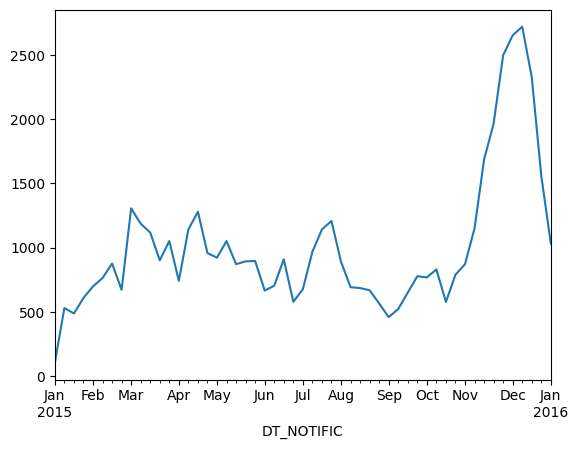

In [8]:
casos.ID_AGRAVO.resample('1W').count().plot();